**INITIALIZATION**
- I use these three lines of code on top of my each notebooks because it will help to prevent any problems while reloading the same project. And the third line of code helps to make visualization within the notebook.

In [1]:
#@ INITIALIZATION: 
%reload_ext autoreload
%autoreload 2
%matplotlib inline

**LIBRARIES AND DEPENDENCIES**
- I have downloaded all the libraries and dependencies required for the project in one particular cell.

In [3]:
#@ INSTALLING DEPENDENCIES: UNCOMMENT BELOW: 
# !pip install -Uqq fastbook
# import fastbook
# fastbook.setup_book()

In [8]:
#@ DOWNLOADING LIBRARIES AND DEPENDENCIES: 
from fastbook import *                                  # Getting all the Libraries. 
from fastai.callback.fp16 import *
from fastai.vision.all import *                         # Getting all the Libraries.
#@ IGNORING WARNINGS: 
import warnings
warnings.filterwarnings("ignore")

**PREPARING THE DATASET**

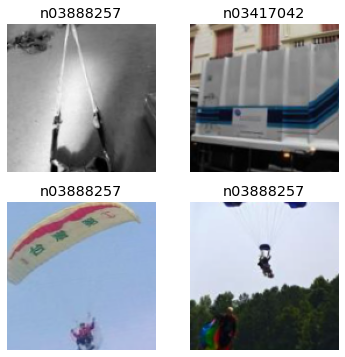

In [9]:
#@ FUNCTION FOR PREPARING THE DATASET:
def get_data(url, presize, resize):                                             # Defining Function. 
    path = untar_data(url)                                                      # Getting Path to the Dataset. 
    return DataBlock(blocks=(ImageBlock, CategoryBlock),                        # Initializing Data Blocks. 
                     get_items=get_image_files,                                 # Getting Image Files. 
                     splitter=GrandparentSplitter(valid_name="val"),            # Splitting the Dataset. 
                     get_y=parent_label, item_tfms=Resize(presize),             # Initializing Item Transformations. 
                     batch_tfms=[*aug_transforms(min_scale=0.5, size=resize),   # Initializing Batch Transformations. 
                                 Normalize.from_stats(*imagenet_stats)],        # Normalizing the Dataset. 
                     ).dataloaders(path, bs=128)                                # Initializing Data Loaders. 

#@ INITIALIZING DATA LOADERS: 
dls = get_data(URLs.IMAGENETTE_160, 160, 128)                                   # Implementation of Function. 
dls.show_batch(max_n=4)                                                         # Inspecting the Data. 

**FULLY CONVOLUTIONAL NETWORKS**
- The idea in **Fully Convolutional Networks** is to take the average of activations across a convolutional grid. A **Fully Convolutional Networks** has a number of convolutional layers, some of which will be stride 2 convolutions at the end of which is an adaptive average pooling layer, a flatten layer to remove the unit axis and finally a linear layer. 

In [ ]:
#@ FULLY CONVOLUTIONAL NEURAL NETWORKS: BASELINE MODEL: 
def block(ni, nf): return ConvLayer(ni, nf, stride=2)        # Defining Convolutional Layer. 
def get_model():                                             # Defining Fully Convolutional Network.             
    return nn.Sequential(block(3, 16),                       # Initializing Convolutional Layer. 
                         block(16, 32),                      # Initializing Convolutional Layer. 
                         block(32, 64),                      # Initializing Convolutional Layer. 
                         block(64, 128),                     # Initializing Convolutional Layer. 
                         block(128, 256),                    # Initializing Convolutional Layer. 
                         nn.AdaptiveAvgPool2d(1),            # Initializing Adaptive Average Pooling Layer. 
                         Flatten(),                          # Removing Unit Axis. 
                         nn.Linear(256, dls.c))              # Initializing Final Linear Layer. 